## End_to_End Cold Email Generator using Langchain & Groq

### Tech stack used:
1. Llama - 3.1 gen ai model
2. Langchain => orchestation framework
3. Chroma db => for vector stores
4. Streamlit => UI
5. Python => Programming Language
6. Groq => cloud for faster inference for Llama models

# Problem Statement:

There are software companies like Accenture, TCS, Infosys, IBM, HCL etc....
These companies help clients like Nike, BOFA, JP Morgan etc, there are lot of businesses through out the globe who wants to build the software. The software compnies has software engineers and they provide services to Clients.

There is a lot of competetion in the market and many times salaes teams from this companies they use variety of marketing techniques to build to acquire projects. One of the technique is cold email.

SO a person from software services suck as Accenture will send a cold email to potential client.

Now how do they know, these clients have a specific requirements.
1. One of the technique is they will go to their job portal and their they will find out for ex: they need a software engineer AI/ML developer. They will look at all the skill set and etc

2. Now what Accenture will do is, it will send a cold email like hey you looks like a AI/ML engineeer. we have these people instead of hiring full time, may be you can hire people from us.

3. mostly these clients are operates from US, UK and other countries. They will look for a people India, indonesisa where people work for low cost.

4. instead of hiring full time employees you can hire contract base, so there are several benefits of using this models.

5. Accenture will send this kind of cold email to Nike, jp morgan, bofa etc

6. Many times this cold email technique works.

7. Now sales representative at Accenture will have to form a nice email which is relavant to job posts

8. One of the things we can use that is, LLM's

9. Using LLM's, we can generate a cold email

10. For ex: let say if i build a project where you can give a job posting url or company job portal. it will go to that job portal and it wil figure out what kind of skills are needed based on that which will write an email which is relavant to the job post

11. for example instead of going and checking manually, if it's identifies this client is looking for AI?ML and devops knowledge

12. This email exactly talk about the skills you will have this kind of portfolio

13.Portfolio nothing but,....the past projects you have done previously(Accenture previous projects)

# Technical Architure:

Extract the Text from the careers portal ==> Using Langchain Framework ==> Then will use Llama 3.1 LLM ==> to extract the job role, description, skills in a json format ==> then we will give that information to chroma vector db(here we will store and previously stored skills& portfolio for the company )-> for example www.accenture.com/python this kind of links are already stored ==> this vector db gives portfolio links/skills to the Llama 3.1 so that will generate a nice cold email

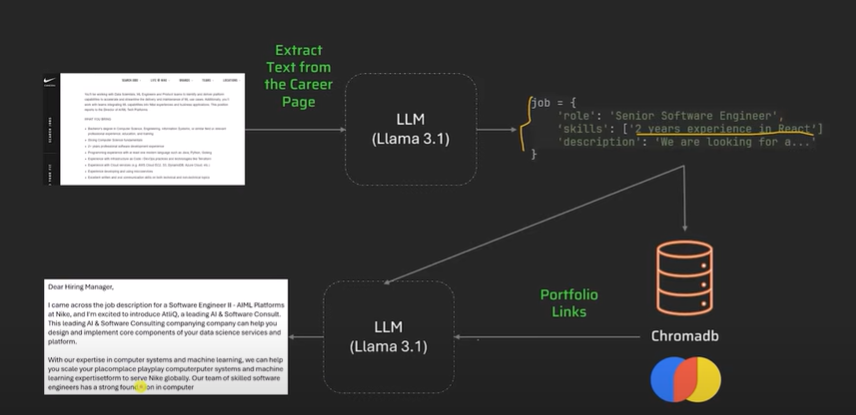

Llama 3.1 is a super amazing open source LLM that uses for free. 

In this proect i am not going run the llama using ollama run or locally. because it is taking lot of time for inferencing.

Lama models ==> https://www.llama.com/docs/model-cards-and-prompt-formats/llama3_1/

what i will do is....i will groq

what is Groq?

Groq is a platform which allows you to run llama 3.1 in cloud and inference is very very fast because they use something called LPU (Language processing unit) that makes the inference that means when you ask a question, the response will come very faster.

Groq official website ==> https://groq.com/


# Generate a Groq api key for faster inference

1. login with gmail
2. create api key
3. copy the api key

Let's start the Journey

in this journey we will use

chatGroq library ==> https://python.langchain.com/docs/integrations/chat/groq/

In [ ]:
# %pip install langchain
# %pip install -qU langchain-groq
# %pip install python-dotenv
# %pip install chromadb

In [ ]:
import getpass
import os
from dotenv import load_dotenv

load_dotenv()

if "GROQ_API_KEY" not in os.environ:
    os.environ["GROQ_API_KEY"] = getpass.getpass("Enter your Groq API key: ")

print(os.environ["GROQ_API_KEY"])

In [ ]:
from langchain_groq import ChatGroq


llm = ChatGroq(
    model="llama-3.1-8b-instant",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    # other params...
)

In [ ]:
response = llm.invoke("who is The first landed on the moon")
response.content

step -2: set up a vector db => https://docs.trychroma.com/docs/overview/introduction

In [ ]:
# Chroma Vector db is a light weight and open source vector db

# install chroma db

# %pip install chromadb

# CHROMA DB SET UP

In [ ]:
import chromadb

client = chromadb.Client()
collection = client.create_collection(name="my-collection")

# Add Documents to chroma db

In [ ]:
collection.add(
    documents=[
        "This document is about new york",
        "This document is about Delhi",
        "This document is about Hyderabad"
    ],
    ids = ['id1', 'id2', 'id3']
)

# Get all docs from chroma db

In [ ]:
# get all docs
all_docs = collection.get()
all_docs

# Get doc using id

In [ ]:
# Get items by using id numbers
collection.get(ids=["id1"])

# Query the chroma db

In [ ]:
results = collection.query(
    query_texts=["air pollution"],
    n_results=2
)
results

# Delete the Documents from chroma db

In [ ]:
collection.delete(ids=all_docs['ids'])
collection.get()

# Lets add metata

In [ ]:
collection.add(
    documents=[
        "This document is about new york",
        "This document is about Delhi",
        "This document is about Hyderabad"
    ],
    ids = ['id1', 'id2', 'id3'],
    metadatas=[
        {"url": "https://en.wikipedia.org/wiki/New_York_City"},
        {"url": "https://en.wikipedia.org/wiki/New_Delhi"},
        {"url": "https://en.wikipedia.org/wiki/Hyderabad"}
    ]
)

In [ ]:
collection.get()

# let's ask the same query

In [ ]:
results = collection.query(
    query_texts=["This query is about chicken biryani"],
    n_results=2
)
results

# Email generator.py

In [ ]:
nike_jobs_portal = "https://careers.nike.com/senior-digital-platform-operations-na/job/R-61891"

# in langchain official document we have webBaseLoader => it load the url and ==> https://python.langchain.com/docs/integrations/document_loaders/web_base/

# basically it's webscrapping

from langchain_community.document_loaders import WebBaseLoader

loader = WebBaseLoader(nike_jobs_portal)
page_data = loader.load().pop().page_content
print(page_data)

In [31]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    model="llama-3.1-8b-instant",
    temperature=0,
)

### Let's write a prompt for our LLM

In [41]:
from langchain_core.prompts import PromptTemplate

prompt_extract = PromptTemplate.from_template(
    """ 
    ### SCRAPED TEXT FROM WEBSITE:
    {page_data}
    ### INSTRUCTION:
    The scraped text is from the career's page of a website.
    Your job is to extract the job postings and return them in JSON format containing
    the following keys: 'role', 'experience', 'skills' and 'description'.
    only return the valid JSON
    ### VALID JSON (NO PREAMBLE):
    """
)
prompt_extract

In [43]:
chain_extract = prompt_extract | llm # this will form a chain
res = chain_extract.invoke(input={'page_data': page_data})
(print(res.content))
print(type(res.content))

In [47]:
# Now the response is in str format so let me change it to json

from langchain_core.output_parsers import JsonOutputParser

json_parser = JsonOutputParser()
json_res = json_parser.parse(res.content)
print(json_res)

In [46]:
type(json_res)

In [48]:
import pandas as pd

df = pd.read_csv('my_portfolio.csv')
df.head()

# store this csv file into chroma db

In [ ]:
import chromadb
import uuid

client = chromadb.PersistentClient('vectorstore') # it will create the db store it in folder 
collection = client.get_or_create_collection(name='portfolio')

if not collection.count():
    for _, row in df.iterrows():
        collection.add(documents=row["Techstack"],
                       metadatas={"links": row["Links"]},
                       ids=[str(uuid.uuid4())])

In [55]:
links = collection.query(
    query_texts=["Experince in Python", "Experience in React"],
    n_results=5
).get('metadatas')

links

In [59]:
job = json_res
job[0]['skills']

# email prompt template

In [60]:
prompt_email = PromptTemplate.from_template(
    """
    ### JOB DESCRIPTION:
    {job_description}
    
    ### INSTRUCTION:
    You are Raju, a business development executive at AtliQ. AtliQ is an AI & Software Consulting company dedicated to facilitating
    the seamless integration of business processes through automated tools. 
    Over our experience, we have empowered numerous enterprises with tailored solutions, fostering scalability, 
    process optimization, cost reduction, and heightened overall efficiency. 
    Your job is to write a cold email to the client regarding the job mentioned above describing the capability of AtliQ 
    in fulfilling their needs.
    Also add the most relevant ones from the following links to showcase Atliq's portfolio: {link_list}
    Remember you are Mohan, BDE at AtliQ. 
    Do not provide a preamble.
    ### EMAIL (NO PREAMBLE):
    
    """
    )

chain_email = prompt_email | llm
res = chain_email.invoke({"job_description": str(job), "link_list": links})
print(res.content)